<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 04</o>: <m>(__Num 4 ML__)</m>

> <c>Playing with ill conditioned matrix</c>




In [1]:
import numpy as np
import matplotlib.pyplot as plt

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

#### <c>Hilbert matrix</c>

$$ H_{i,j} = \int_{0}^{1} x^{i+j-2}\,dx  = \frac{1}{i+j-1} $$

In [40]:
n = 20
H = np.asarray([1/(i+j-1) for i in range(1,n+1) for j in range(1,n+1)]).reshape(n,n)
detH = np.linalg.det(H)
print(f"The determinant of H is {detH:2.3e}.")

The determinant of H is -1.100e-195.


`Lets calculte condition number`

$$ cond(A)_p \approxeq \|A\|_p \|A^{-1}\|_p $$

In [3]:
def conditionNumber(A,order):
    assert(len(A.shape) == 2)
    return np.linalg.norm(A,ord=order)*np.linalg.norm(np.linalg.inv(A),ord=order)

In [4]:
condH_Frob = conditionNumber(H,order='fro')
condH_2 = conditionNumber(H,order=2)
print(f"The frobenius condition number of H is {condH_Frob:2.3e} and the 2-norm is {condH_2:2.3e}.")

The frobenius condition number of H is 4.808e+05 and the 2-norm is 4.766e+05.


#### Theory vs computation

The condition number of  $n\times n $ Hilbert matrix grows 
$$ O((1+\sqrt(2)^{4n})/\sqrt(n)) $$

In [5]:
theoryCond = lambda n: ((1+np.sqrt(2)**(4*n))/np.sqrt(n))
hilbertMat = lambda n: np.asarray([1/(i+j-1) for i in range(1,n+1) for j in range(1,n+1)]).reshape(n,n)
N = 100
resultsTheory = np.asarray([theoryCond(i) for i in range(2,N+1)])
resultsComp = np.asarray([conditionNumber(hilbertMat(i),order=2) for i in range(2,N+1)])

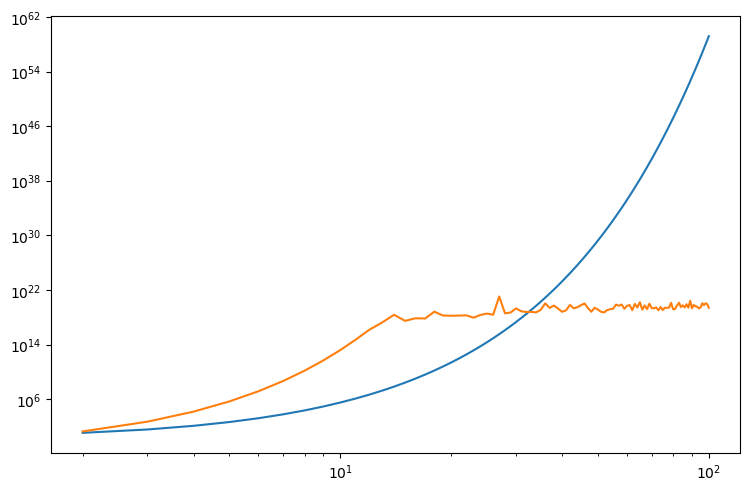

In [6]:
fig = plt.figure(figsize=plt.figaspect(0.65),layout='constrained')

ax = fig.add_subplot(1,1,1)
ax.loglog(list(range(2,N+1)),resultsTheory,label="Theory")
ax.loglog(list(range(2,N+1)),resultsComp,label="Computation")



### You can also use theoritical inverse of Hilbert matrix for comparison (`practice`)
$$ (H^{-1})_{ij} = (-1)^{i+j} (i+j+1)\binom{n+i-1}{n-j}\binom{n+j-1}{n-i}\binom{n+i-2}{n-i}^{2} $$

### Polynomial Regression

$$ P(x) a = b \Rightarrow a_0 + a_1 x_i + a_2 x_i^2 + \cdots a_n x_i^{n-1} = b_i  $$

In [111]:
F = lambda x: x * np.sin(np.pi*x)

def Pol_Reg(order,M,N):
    F = lambda x: x * np.sin(np.pi*x)
    x = np.linspace(-1,1,num=M)
    A = np.vander(x,increasing=True,N=order)
    coeffs = np.linalg.pinv(A)@F(x).flatten()
    xx = np.linspace(-1,1,num=N)
    pred = np.vander(xx,N=order,increasing=True).dot(coeffs)
    maxError = np.max(np.abs(pred - F(xx)))
    cond = np.linalg.cond(A)
    return pred,maxError,cond

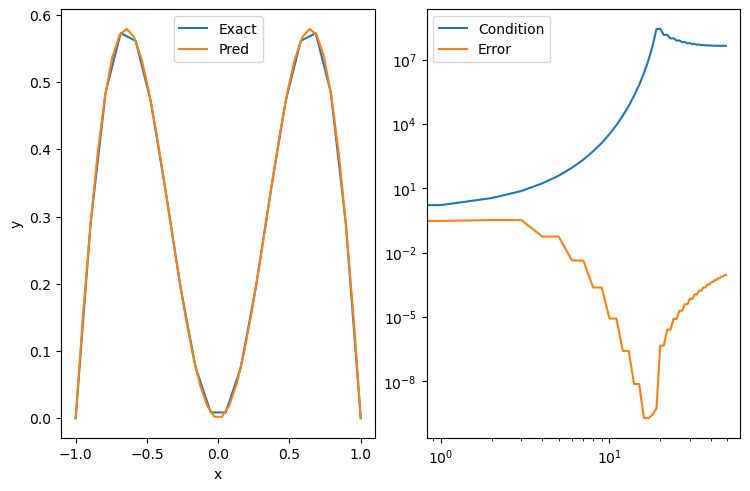

In [132]:
M,N = 20,40
x = np.linspace(-1,1,num=M)
xx = np.linspace(-1,1,num=N)
pred,maxError,cond = Pol_Reg(order=10,M=M,N=N)
fig = plt.figure(figsize=plt.figaspect(0.65),layout='constrained')
ax = fig.add_subplot(1,2,1)
ax.plot(x,F(x),label="Exact")
ax.plot(xx,pred,label='Pred')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

resCond = []
resErr = []

for i in range(50):
    _,maxError,cond = Pol_Reg(order=i+1,M=M,N=N)
    resCond.append(cond)
    resErr.append(maxError)

ax2 = fig.add_subplot(1,2,2)
ax2.loglog(resCond,label="Condition")
ax2.loglog(resErr,label="Error")
ax2.legend()
plt.show()